In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# <font face="gotham" color="orange"> Bayesian Conjugates</font>

In general Bayesian econometrics are computationally heavy, however in some special cases, we can derive posterior analytically. And these case all involves using **conjugate priors**, which are certain type of distributions and are able to derive posterior analytically. 

The conjugate priors and posterior will have the same distribution function except parameters. 

Some common combinations of conjugate priors are 
\begin{align}
&\text{beta prior distribution } + \text{binomial data} \rightarrow \text{beta posterior distribution} \\
&\text{gamma prior distribution } + \text{Poisson data} \rightarrow \text{gamma posterior distribution} \\
&\text{normal prior distribution } + \text{normal data} \rightarrow \text{normal posterior distribution} 
\end{align}

## <font face="gotham" color="orange">The Beta-Binomial Conjugate</font>

The beta distribution is usually used for modeling 'the probability of probability', due to its range $[0, 1]$.

$$
f(p;\alpha, \beta)=\frac{1}{\mathrm{~B}(\alpha, \beta)} p^{\alpha-1}(1-p)^{\beta-1}
$$
where $\alpha$ and $\beta$ are shape parameters both are positive numbers. Here are Beta distribution with different parameters.

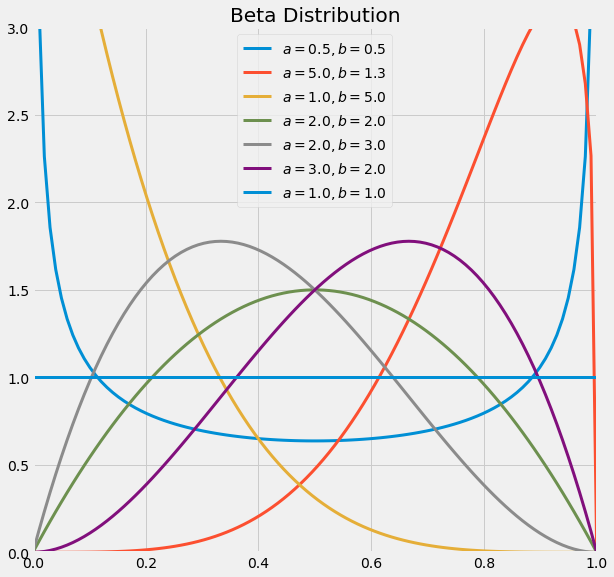

In [24]:
x = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)

params = np.array([[[.5,.5]],
                  [[5,1.3]],
                  [[1,5]],
                  [[2,2]],
                  [[2,3]],
                  [[3,2]],
                  [[1,1]]])
for i in range(params.shape[0]):
    beta_pdf = sp.stats.beta.pdf(x, params[i][0][0], params[i][0][1])
    ax.plot(x, beta_pdf, lw = 3, label = '$a = %.1f, b =  %.1f$' % (params[i][0][0], params[i][0][1]))
    ax.legend()
ax.set_title('Beta Distribution')

ax.axis([0, 1, 0, 3])
plt.show()

The likelihood are obtained from a binomial distribution.
\begin{equation}
\mathcal{L}(k; n, p)=\binom{n}{k} p^k(1-p)^{n-k}
\end{equation}
The number of trials is denoted $n$. The number of observed successes is denoted as $y$. The probability of success is denoted as $p$.

The Bayes' Theorem in probability distribution form will do the work for us
$$
p(\theta \mid y)=\frac{p(y \mid \theta) p(\theta)}{\int_0^1p(y \mid \theta) p(\theta) d\theta}
$$

Substitute in prior and likelihood accordingly
$$
P(p \mid y)=\frac{\left(\begin{array}{l}
n \\
y
\end{array}\right) p^{k}(1-p)^{(n-k)}  \frac{1}{\mathrm{B}\left(\alpha_{0}, \beta_{0}\right)} p^{\alpha_{0}-1}(1-p)^{\beta_{0}-1}}{\int_{0}^{1}\left(\begin{array}{l}
n \\
y
\end{array}\right) p^{k}(1-p)^{(n-k)}  \frac{1}{\mathrm{B}\left(\alpha_{0}, \beta_{0}\right)} p^{\alpha_{0}-1}(1-p)^{\beta_{0}-1} d p}
$$

Cancel out the constant terms
$$
P(p \mid \text {y})=\frac{p^{k}(1-p)^{(n-k)}  p^{\alpha_{0}-1}(1-p)^{\beta_{0}-1}}{\int_{0}^{1} p^{k}(1-p)^{(n-k)}  p^{\alpha_{0}-1}(1-p)^{\beta_{0}-1} d p}
$$

Join terms 
$$
P(p \mid y)=\frac{p^{\alpha_{0}+k-1}(1-p)^{\left(\beta_{0}+n-k-1\right)}}{\int_{0}^{1} p^{\alpha_{0}+k-1}(1-p)^{\left(\beta_{0}+n-k-1\right)} d p}
$$

To ensure the denominator integrates to $1$, we multiply an inverse of Beta function to both numerator and denominator.

$$
\frac{1}{B\left(\alpha_{0}+y, \beta_{0}+n-k\right)}
$$

$$
P(p \mid y)=\frac{\frac{1}{B\left(\alpha_{0}+k, \beta_{0}+n-k\right)}p^{\alpha_{0}+k-1}(1-p)^{\left(\beta_{0}+n-k-1\right)}}{\frac{1}{B\left(\alpha_{0}+k, \beta_{0}+n-k\right)}\int_{0}^{1} p^{\alpha_{0}+k-1}(1-p)^{\left(\beta_{0}+n-k-1\right)} d p}
$$

Now the denominator is $1$, which leaves us posterior
$$
P(p \mid y)=\frac{1}{B\left(\alpha_{0}+k, \beta_{0}+n-k\right)}p^{\alpha_{0}+k-1}(1-p)^{\left(\beta_{0}+n-k-1\right)}
$$

### <font face="gotham" color="orange">An Example of Beta-Binomial Conjugate</font>

Suppose we would to like to how estimate a basketball player's _free throw_ probability. For the prior, we don't much about him, he can be an excellent or awful player, so we choose $\alpha_0=\beta_0=.5$, the subscript zero represent priors. The plot tells our subjective view toward the player, he either has very high or very low probability of scoring. 

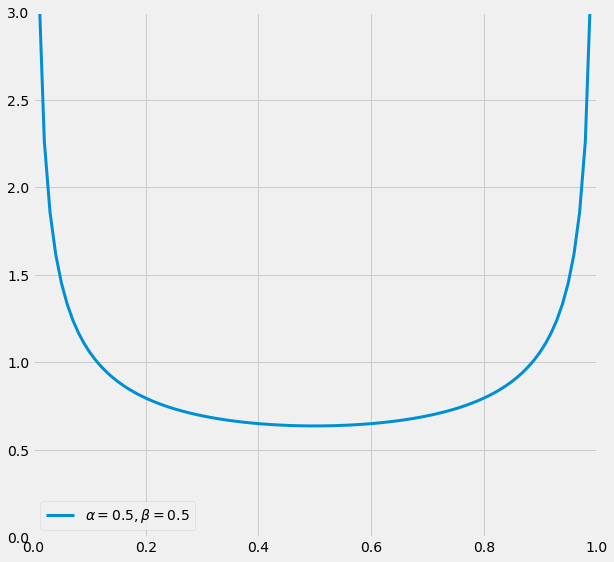

In [27]:
x = np.linspace(0, 1, 100)
params = [.5, .5]
beta_pdf = sp.stats.beta.pdf(x, params[0], params[1])

fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(x, beta_pdf, lw = 3, label = r'$\alpha = %.1f, \beta =  %.1f$' % (params[0], params[1]))
ax.legend()

ax.axis([0, 1, 0, 3])
plt.show()

Suppose in a $10$ shots attempt, he made $2$ scores. How do we calculate the likelihood? We don't need to, because we have already the closed-form posterior derived.

Therefore, what we can do is to update the posterior by incorporating the likelihood parameters $n=10$ and $k=2$.
$$
\alpha_0+k = .5+2 = 2.5\\
\beta_0+n+k = .5+10+2 = 12.5
$$

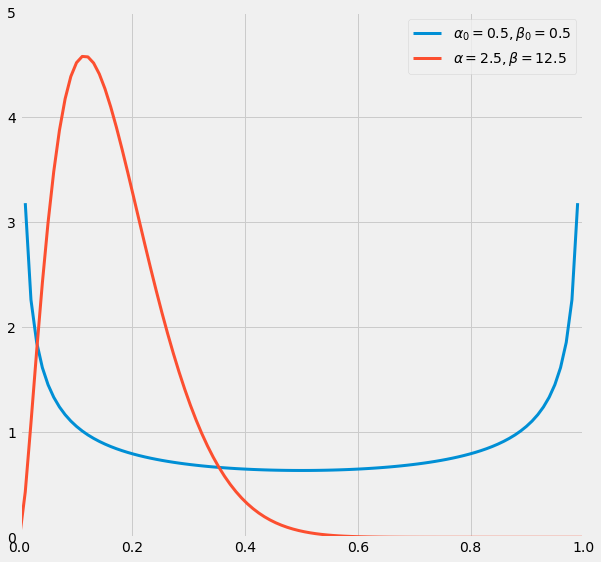

In [7]:
x = np.linspace(0, 1, 100)
params_prior = [.5, .5]
params_post = [2.5, 12.5]
beta_prior = sp.stats.beta.pdf(x, params_prior[0], params_prior[1])
beta_post = sp.stats.beta.pdf(x, params_post[0], params_post[1])

fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(x, beta_prior, lw = 3, label = r'$\alpha_0 = %.1f, \beta_0 =  %.1f$' % (params_prior[0], params_prior[1]))
ax.plot(x, beta_post, lw = 3, label = r'$\alpha = %.1f, \beta =  %.1f$' % (params_post[0], params_post[1]))
ax.legend()

ax.axis([0, 1, 0, 5])
plt.show()

The posterior will be prior for next round of estimation, say $n= 10$ and $k=4$. 
$$
\alpha_0+k = 2.5+4 = 6.5\\
\beta_0+n+k = 12.5+10+4 = 26.5
$$

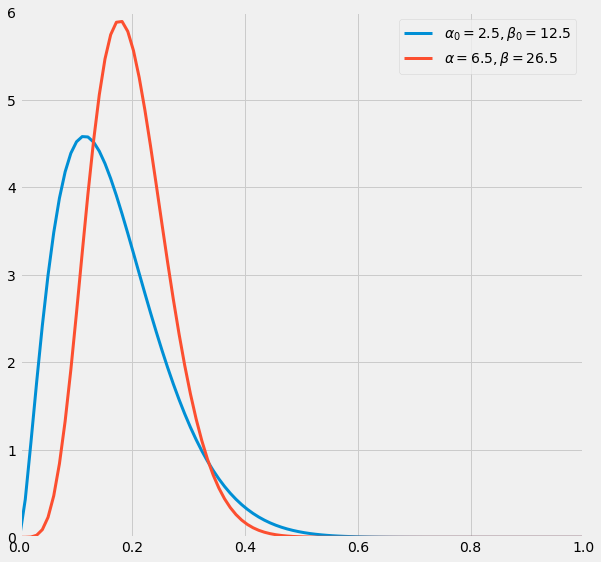

In [8]:
x = np.linspace(0, 1, 100)
params_prior = [2.5, 12.5]
params_post = [6.5, 26.5]
beta_prior = sp.stats.beta.pdf(x, params_prior[0], params_prior[1])
beta_post = sp.stats.beta.pdf(x, params_post[0], params_post[1])

fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(x, beta_prior, lw = 3, label = r'$\alpha_0 = %.1f, \beta_0 =  %.1f$' % (params_prior[0], params_prior[1]))
ax.plot(x, beta_post, lw = 3, label = r'$\alpha = %.1f, \beta =  %.1f$' % (params_post[0], params_post[1]))
ax.legend()

ax.axis([0, 1, 0, 6])
plt.show()

And note that the mean of the beta distribution can be pinned with $\alpha$ and $\beta$, we can use this formula to characterize your beta priors.
\begin{align}
\text{mean:}&\quad\mathrm{E}[p]=\frac{\alpha}{\alpha+\beta}\\
\text{mode:}&\quad \frac{\alpha-1}{\alpha+\beta-2} \text { for } \alpha, \beta>1
\end{align}
For instance, if we want mean to equal $.88$, we can choose $\beta=3$, then solve the equation
$$
.88 =\frac{\alpha}{\alpha+3}
$$
In this case, we obtain $\alpha=22$. Therefore mode will be $.91$.

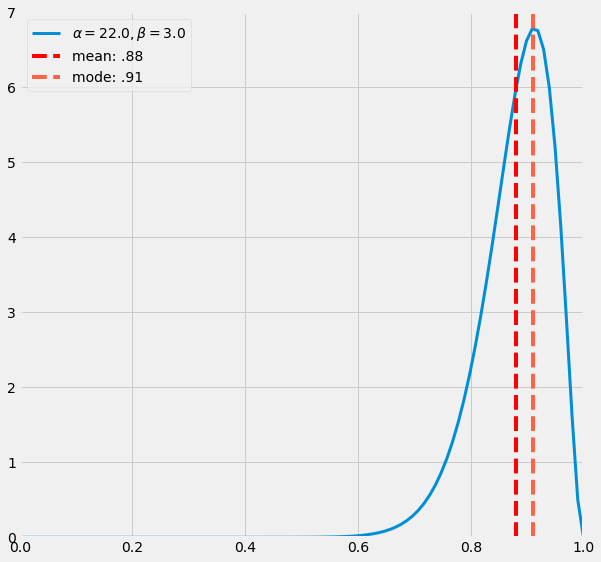

In [73]:
x = np.linspace(0, 1, 100)
params = [22, 3]
beta_pdf = sp.stats.beta.pdf(x, params[0], params[1])

fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(x, beta_pdf, lw = 3, label = r'$\alpha = %.1f, \beta =  %.1f$' % (params[0], params[1]))
ax.axvline(.88, color='r',ls='--',label='mean: .88')
ax.axvline(.91, color='tomato',ls='--',label='mode: .91')
ax.axis([0, 1, 0, 7])
ax.legend()
plt.show()

## <font face="gotham" color="orange">The Gamma-Poisson Conjugate</font>

The usually form of the Gamma distribution as a prior in Bayesian estimation has the following form
$$
p(\lambda ; \alpha, \beta)=\frac{\beta_{0}^{\alpha_{0}} \lambda^{\alpha_{0}-1} e^{-\beta_{0} \lambda}}{\Gamma\left(\alpha_{0}\right)}
$$
where $\alpha$ and $\beta$ are hyperparameters, the former determines the shape, the latter determines the scale.

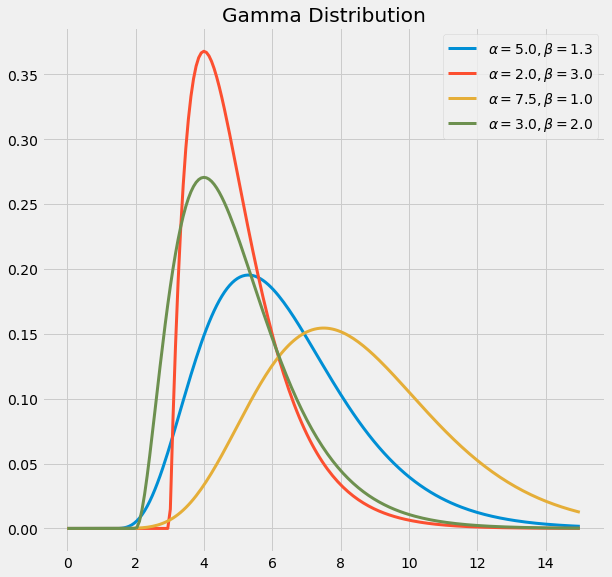

In [26]:
x = np.linspace(0, 15, 200)

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
params = np.array([[[5,1.3]],
                  [[2,3]],
                  [[7.5,1]],
                  [[3,2]]])
for i in range(params.shape[0]):
    gamma_pdf = sp.stats.gamma.pdf(x, params[i][0][0], params[i][0][1])
    ax.plot(x, gamma_pdf, lw = 3, label = r'$\alpha = %.1f, \beta =  %.1f$' % (params[i][0][0], params[i][0][1]))
    ax.legend()
ax.set_title('Gamma Distribution')

plt.show()

The Poisson distribution will be used for likelihood function
$$
P(\operatorname{data} \mid \lambda)=\mathcal{L}\left(x_{1} \ldots x_{n} ; \lambda\right)=\prod_{i=1}^{n} \frac{\lambda^{x_{i}} e^{-\lambda}}{x_{i} !}=\frac{\lambda^{\Sigma x_{i}} e^{-n \lambda}}{\prod_{i=1}^{n} x_{i} !}
$$
$\lambda$ is the average number of successes and $x$ is the number of successes.

Use Bayes' Theorem
$$
P(\lambda \mid \text { data })=\frac{\frac{\lambda^{\Sigma x_{i}} e^{-n \lambda}}{\prod x_{i} !} \quad \frac{\beta_{0}^{\alpha_{0}} \lambda^{\alpha_{0}-1} e^{-\beta_{0} \lambda}}{\Gamma\left(\alpha_{0}\right)}}{\int_{0}^{\infty} \frac{\lambda^{\Sigma x_{i}} e^{-n \lambda}}{\prod x_{i} !} \quad \frac{\beta_{0}^{\alpha_{0}} \lambda^{\alpha_{0}-1} e^{-\beta_{0} \lambda}}{\Gamma\left(\alpha_{0}\right)} \quad d \lambda}
$$

After some canceling and joining term
$$
P(\lambda \mid \text { data })=\frac{\lambda^{\alpha_{0}+\Sigma x_{i}-1} e^{-\lambda\left(\beta_{0}+n\right)}}{\int_{0}^{\infty} \lambda^{\alpha_{0}+\Sigma x_{i}-1} e^{-\lambda\left(\beta_{0}+n\right)} d \lambda}
$$

To render denominator to $1$, multiply a common term both onto numerator and denominator. You can compare with prior.

$$
p(\lambda ; \alpha, \beta)=\frac{\beta_{0}^{\alpha_{0}} \lambda^{\alpha_{0}-1} e^{-\beta_{0} \lambda}}{\Gamma\left(\alpha_{0}\right)}
$$

$$
P(\lambda \mid \text { data })=\frac{\frac{(\beta_0+n)^{\alpha_{0}+\Sigma x_{i}}}{\Gamma\left(\alpha_{0}+\Sigma x_{i}\right)} \quad \lambda^{\alpha_{0}+\Sigma x_{i}-1} e^{-\lambda\left(\beta_{0}+n\right)}}{\frac{\left(\beta_{0}+n\right)^{\alpha_{0}+\Sigma x_{i}}}{\Gamma\left(\alpha_{0}+\Sigma x_{i}\right)} \quad \int_{0}^{\infty} \lambda^{\alpha_{0}+\Sigma x_{i}-1} e^{-\lambda\left(\beta_{0}+n\right)} d \lambda}
$$

Finally we obtain posterior
$$
P(\lambda \mid \text { data })=\frac{\left(\beta_{0}+n\right)^{\alpha_{0}+\Sigma x_{i}} \lambda^{\alpha_{0}+\Sigma x_{i}-1} e^{-\lambda\left(\beta_{0}+n\right)}}{\Gamma\left(\alpha_{0}+\Sigma x_{i}\right)}
$$

Posterior parameters are
$$
\alpha = \alpha_{0}+\sum_{i=1}^{n} \chi_{i}\\
\beta = \beta_0 + n
$$

### <font face="gotham" color="orange">An Example of Gamma-Poisson Conjugate</font>

The gamma distribution skews to the right and contain only positive values, we can use it for modeling number of hurricanes. 
Suppose a country have in average $5$ times of hurricane, we can choose shape $\alpha_0= 10$ and and rate $\beta_0=2$, then variance is $\frac{10}{4}$. 

The mean and variances are 
$$
E(\lambda) = \frac{\alpha}{\beta}\\
\text{Var}(\lambda) = \frac{\alpha}{\beta^2}
$$

In ```Scipy``` context, the function uses _scale parameter_ rather than _rate parameter_, however they are just inverse of each other.

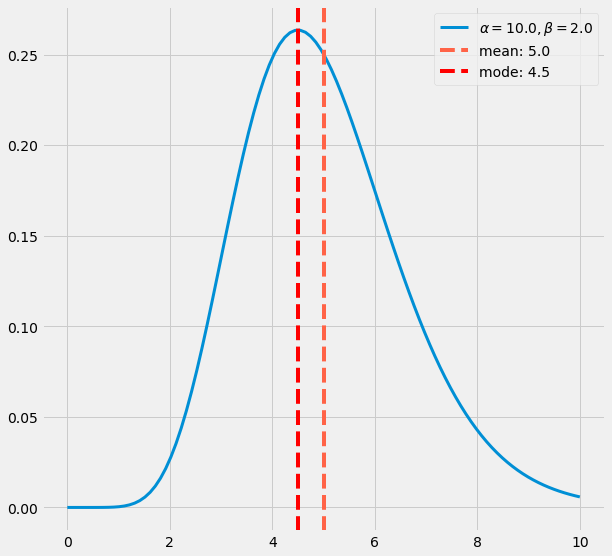

In [76]:
x = np.linspace(0, 10, 100)
params = [10, 2]
gamma_pdf = sp.stats.gamma.pdf(x, a=params[0], scale=1/params[1])

fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(x, gamma_pdf, lw = 3, label = r'$\alpha = %.1f, \beta =  %.1f$' % (params[0], params[1]))

mean = params[0]/params[1]
mode = (params[0]-1)/params[1]
ax.axvline(mean, color = 'tomato', ls='--', label='mean: {}'.format(mean))
ax.axvline(mode, color = 'red', ls='--', label='mode: {}'.format(mode))
ax.legend()
plt.show()

After $12$ year, the data records in total $29$ hurricanes. Update the prior
\begin{align}
\alpha_{\text {posterior }}&=\alpha_{0}+\sum_{i=1}^{n} x_{i} = 10+29=39\\
\beta_{\text {posterior }}&=\beta_{0}+n = 2+10=12
\end{align}

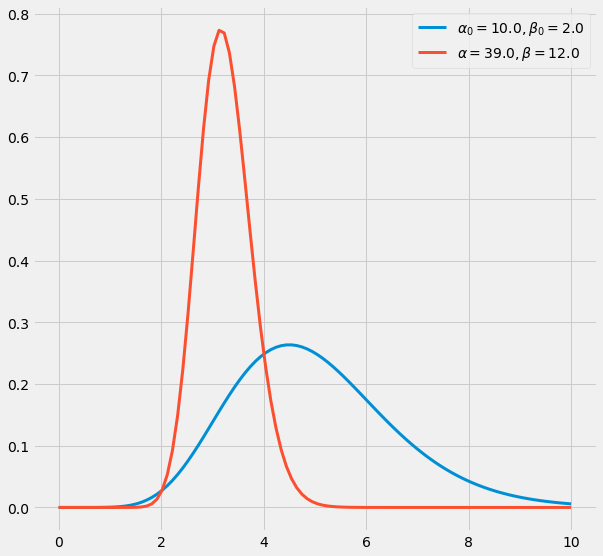

In [81]:
x = np.linspace(0, 10, 100)
params_prior = [10, 2]
params_post = [39, 12]
gamma_pdf_prior = sp.stats.gamma.pdf(x, a=params_prior[0], scale=1/params_prior[1])
gamma_pdf_post = sp.stats.gamma.pdf(x, a=params_post[0], scale=1/params_post[1])

fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(x, gamma_pdf_prior, lw = 3, label = r'$\alpha_0 = %.1f, \beta_0 =  %.1f$' % (params_prior[0], params_prior[1]))
ax.plot(x, gamma_pdf_post, lw = 3, label = r'$\alpha = %.1f, \beta =  %.1f$' % (params_post[0], params_post[1]))

ax.legend()
plt.show()

Another $5$ years, recorded $9$ hurricanes altogether. The previous posterior will be current prior
\begin{align}
\alpha_{\text {posterior }}&=\alpha_{0}+\sum_{i=1}^{n} x_{i} = 39+9=48\\
\beta_{\text {posterior }}&=\beta_{0}+n = 12+5=17
\end{align}

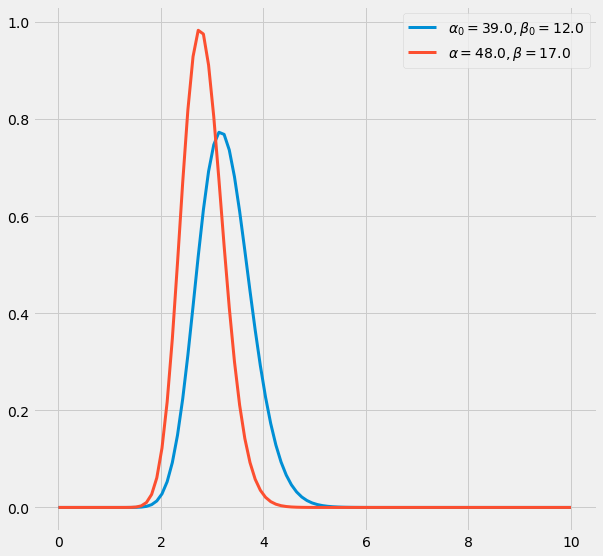

In [82]:
x = np.linspace(0, 10, 100)
params_prior = [39, 12]
params_post = [48, 17]
gamma_pdf_prior = sp.stats.gamma.pdf(x, a=params_prior[0], scale=1/params_prior[1])
gamma_pdf_post = sp.stats.gamma.pdf(x, a=params_post[0], scale=1/params_post[1])

fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(x, gamma_pdf_prior, lw = 3, label = r'$\alpha_0 = %.1f, \beta_0 =  %.1f$' % (params_prior[0], params_prior[1]))
ax.plot(x, gamma_pdf_post, lw = 3, label = r'$\alpha = %.1f, \beta =  %.1f$' % (params_post[0], params_post[1]))

ax.legend()
plt.show()

## <font face="gotham" color="orange">The Normal-Normal Conjugate</font>

The common normal form is
$$
P(x)=f(x ; \mu, \sigma)=\frac{1}{\sqrt{2 \pi} \sigma} e^{-(x-\mu)^{2} /\left(2 \sigma^{2}\right)}
$$
However as a Bayesian prior, the precision $\tau$ is preferred than variance $\sigma^2$, their relationship is $\tau=\frac{1}{\sigma^{2}}$
$$
P(\mu)=f\left(\mu ; \mu_{0}, \tau_{0}\right)=\frac{\sqrt{\tau_{0}}}{\sqrt{2 \pi}} e^{-\frac{1}{2} \tau_{0}\left(\mu-\mu_{0}\right)^{2}}
$$

Or equivalently
$$
P(\mu)=(2 \pi)^{-\frac{1}{2}} \tau_{0}^{\frac{1}{2}} e^{-\frac{1}{2} \tau_{0}\left(\mu-\mu_{0}\right)^{2}}
$$

The likelihood function is 
$$
\mathcal{L}\left(x_{1}, \ldots, x_{n} ; \mu, \sigma\right)=\prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi} \sigma} e^{-\left(x_{i}-\mu\right)^{2} /\left(2 \sigma^{2}\right)}
$$

Also replace $\sigma^2$ by $\tau$
$$
P(\text { data } \mid \mu)=\mathcal{L}\left(x_{1}, \ldots, x_{n} ; \mu, \tau\right)=(2 \pi)^{-\frac{n}{2}} \tau^{\frac{n}{2}} e^{-\frac{1}{2} \tau \Sigma\left(x_{i}-\mu\right)^{2}}
$$

Join terms by Bayes' Theorem
$$
P(\mu \mid \text { data })=\frac{(2 \pi)^{-\frac{n+1}{2}} \tau_{0}^{\frac{1}{2}} \tau^{\frac{n}{2}} e^{-\frac{1}{2}\left(\tau_{0}+n \tau\right)\left[\mu-\frac{\left(\tau_{0} \mu_{0}+\tau \Sigma x_{i}\right)}{\tau_{0}+n \tau}\qquad\right]^{2}+C}}{\int_{-\infty}^{\infty}(2 \pi)^{-\frac{n+1}{2}} \tau_{0}^{\frac{1}{2}} \tau^{\frac{n}{2}} e^{-\frac{1}{2}\left(\tau_{0}+n \tau\right)\left[u-\frac{\left(\tau_{0} \mu_{0}+\tau \Sigma x_{i}\right)}{\tau_{0}+n \tau}\qquad\right]^{2}+C} d u}
$$

Cancel out terms
$$
P(\mu \mid \text { data })=\frac{e^{-\frac{1}{2}\left(\tau_{0}+n \tau\right)\left[\mu-\frac{\left(\tau_{0} \mu_{0}+\tau \Sigma x_{i}\right)}{\tau_{0}+n \tau}\right]^{2}}}{\int_{-\infty}^{\infty} e^{-\frac{1}{2}\left(\tau_{0}+n \tau\right)\left[u-\frac{\left(\tau_{0} \mu_{0}+\tau \Sigma x_{i}\right)}{\tau_{0}+n \tau}\right]^{2}} d u}
$$

To render the denominator to $1$, multiply a common term onto both numerator and denominator
$$
P(\mu \mid \text { data })=\frac{(2 \pi)^{-\frac{1}{2}}\left(\tau_{0}+n \tau\right)^{\frac{1}{2}} e^{-\frac{1}{2}\left(\tau_{0}+n \tau\right)\left[\mu-\frac{\left(\tau_{0} \mu_{0}+\tau \Sigma x_{i}\right)}{\tau_{0}+n \tau}\right]^{2}}}{\int_{-\infty}^{\infty}(2 \pi)^{-\frac{1}{2}}\left(\tau_{0}+n \tau\right)^{\frac{1}{2}} e^{-\frac{1}{2}\left(\tau_{0}+n \tau\right)\left[u-\frac{\left(\tau_{0} \mu_{0}+\tau \Sigma x_{i}\right)}{\tau_{0}+n \tau}\right]^{2}} d u}
$$

The posterior is
$$
P(\mu)=(2 \pi)^{-\frac{1}{2}}\left(\tau_{0}+n \tau\right)^{\frac{1}{2}} e^{-\frac{1}{2}\left(\tau_{0}+n \tau\right)}\left(\mu-\frac{\tau_{0} \mu_{0}+\tau \Sigma x_{i}}{\tau_{0}+n \tau}\right)^{2}
$$

The posterior hyperparameters are
$$
\begin{aligned}
\mu_{\text {posterior }} &=\frac{\tau_{0} \mu_{0}+\tau \sum x_{i}}{\tau_{0}+n \tau} \\
\tau_{\text {posterior }} &=\tau_{0}+n \tau
\end{aligned}
$$